In [1]:
import pickle

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
%matplotlib inline
import pandas as pd

In [3]:
import os, glob
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
from IPython.display import display, HTML, Image

In [5]:
from sklearn.pipeline import make_pipeline
from yellowbrick.regressor import residuals_plot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [6]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor


In [7]:
import timeit

In [8]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

F:\anaconda3\envs\chemical\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [10]:
from pandas_profiling import ProfileReport

In [84]:
data =pd.read_csv('10_PC_02_LHS_500_54854_01_s1_G.csv')
data5k =pd.read_csv(r'F:\ML4ChemcialReactions\chemical5K\10_PC_02_LHS_5000_54854_01_s1_G.csv')

In [85]:
data5k.head()

,T(C),b(CaO),b(SiO2),b(H2O),Vol(aq),pH,nCa(aq),nCa(s),nSi(aq),nSi(s_reac),nPortlandite,nAmor-Sl,mCSHQ,nCa(CSHQ),nSi(CSHQ),nH2O(CSHQ),C/S(CSHQ),nGelPW(CSH)
0,25.0,0.508060,0.304081,3.438876,0.046061,12.47261,0.000934,0.507127,0.000001,0.304080,0.012382,0.0,0.061781,0.494744,0.304080,0.875158,1.627021,0.374278
1,25.0,1.258791,0.566548,4.655774,0.048550,12.47261,0.000984,1.257807,0.000002,0.566546,0.336025,0.0,0.115107,0.921782,0.566546,1.630550,1.627021,0.697336
2,25.0,1.396591,0.697116,4.671613,0.043398,12.47261,0.000880,1.395711,0.000001,0.697115,0.261491,0.0,0.141634,1.134221,0.697115,2.006333,1.627021,0.858048
3,25.0,1.461423,0.327679,7.328584,0.098560,12.47261,0.001998,1.459425,0.000003,0.327676,0.926290,0.0,0.066575,0.533135,0.327676,0.943068,1.627021,0.403321
4,25.0,0.667907,0.389925,7.342961,0.111745,12.47261,0.002265,0.665642,0.000003,0.389922,0.031231,0.0,0.079221,0.634411,0.389922,1.122216,1.627021,0.479938


Index(['T(C)', ' b(CaO)', ' b(SiO2)', ' b(H2O)', ' Vol(aq)', ' pH', ' nCa(aq)',
       ' nCa(s)', ' nSi(aq)', ' nSi(s_reac)', ' nPortlandite', ' nAmor-Sl',
       ' mCSHQ', ' nCa(CSHQ)', ' nSi(CSHQ)', ' nH2O(CSHQ)', ' C/S(CSHQ)',
       ' nGelPW(CSH)'],
      dtype='object')

In [87]:
### Remove the space from the column names
data.columns =[col.strip() for col in data.columns]
data5k.columns =[col.strip() for col in data5k.columns]


In [31]:
data.columns

Index(['T(C)', 'b(CaO)', 'b(SiO2)', 'b(H2O)', 'Vol(aq)', 'pH', 'nCa(aq)',
       'nCa(s)', 'nSi(aq)', 'nSi(s_reac)', 'nPortlandite', 'nAmor-Sl', 'mCSHQ',
       'nCa(CSHQ)', 'nSi(CSHQ)', 'nH2O(CSHQ)', 'C/S(CSHQ)', 'nGelPW(CSH)',
       'ratio'],
      dtype='object')

In [88]:
### Calculate the ratio of CaO to SiO2
data['ratio'] = data['b(CaO)']/data['b(SiO2)']
data5k['ratio'] = data5k['b(CaO)']/data5k['b(SiO2)']

In [20]:
## Devided 3 groups which are based on the Data distribution, particularly pH distribution
group1 = data[data['ratio']>=1.65]
group2 = data[(data['ratio']<1.65) & (data['ratio']>0.67)]
group3 = data[data['ratio']<=0.67]

count    3.110000e+02
mean     1.247261e+01
std      5.670480e-07
min      1.247261e+01
25%      1.247261e+01
50%      1.247261e+01
75%      1.247261e+01
max      1.247262e+01
Name: pH, dtype: float64

Text(0, 0.5, 'b(CaO)')

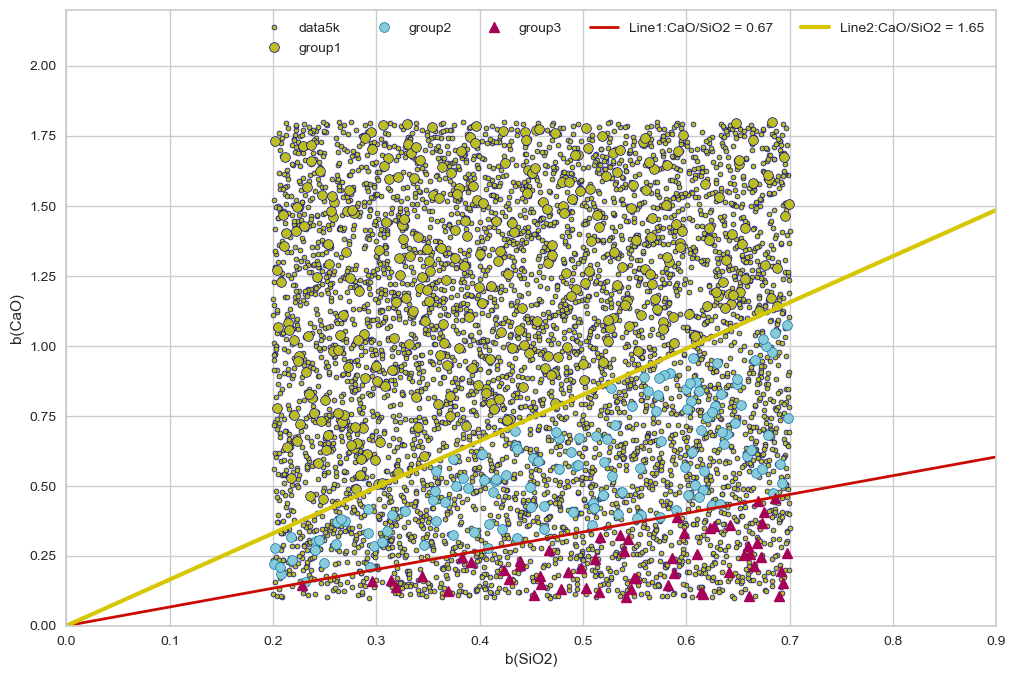

In [90]:
### Visualizing the three groups 
fig, ax =plt.subplots(figsize=(12,8))
x1= np.linspace(0.0,0.9,30);
y1 = 0+0.67*x1
x2= np.linspace(0.0,0.9,30);
y2 = 0+1.65*x2
ax.plot(data5k['b(SiO2)'].values,data5k['b(CaO)'].values,'b.',markerfacecolor = 'tab:olive',markeredgecolor ='darkblue',markeredgewidth=0.5,label='data5k')
ax.plot(group1['b(SiO2)'].values,group1['b(CaO)'].values,'bo',markerfacecolor = 'tab:olive',markeredgecolor ='darkblue',markeredgewidth=0.5,label='group1')
ax.plot(group2['b(SiO2)'].values,group2['b(CaO)'].values,'bo',markerfacecolor = 'c',markeredgecolor ='b',markeredgewidth=0.5,label='group2')
ax.plot(group3['b(SiO2)'].values,group3['b(CaO)'].values,'g^',markerfacecolor = 'm',markeredgecolor ='m',markeredgewidth=1,label='group3')
ax.plot(x1,y1,'r-',lw=2,label ='Line1:CaO/SiO2 = 0.67')
ax.plot(x2,y2,'y-',lw=3,label ='Line2:CaO/SiO2 = 1.65')
ax.legend (loc='best',ncol=5)           
ax.set_xlim(0,0.9)
ax.set_ylim(0,2.2)

ax.set_xlabel('b(SiO2)')
ax.set_ylabel('b(CaO)')



In [1]:
## Split the datasets of the three groups to trainning and test

group1_XY_train,group1_XY_test = train_test_split(group1.values,test_size=0.2, train_size=0.8,shuffle=True)
group2_XY_train,group2_XY_test = train_test_split(group2.values,test_size=0.2, train_size=0.8,shuffle=True)
group3_XY_train,group3_XY_test = train_test_split(group3.values,test_size=0.2, train_size=0.8,shuffle=True)



NameError: name 'train_test_split' is not defined

In [25]:
### This dataset will be saved for testing the models
test_XY=np.concatenate((group1_XY_test,group2_XY_test,group3_XY_test))



Text(0, 0.5, 'b(CaO)')

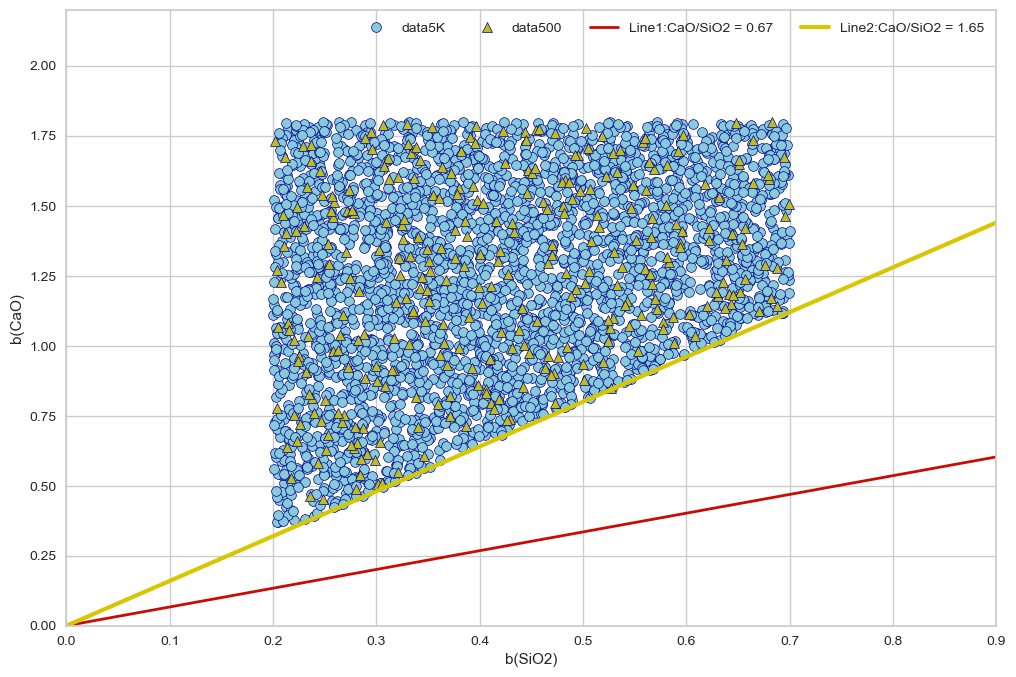

In [109]:
### Visualizing the three groups 
fig, ax =plt.subplots(figsize=(12,8))
df1 = data[data['pH']>=12.45]
df2 = data5k[data5k['pH']>=12.45]
           
x1= np.linspace(0.0,0.9,30);
y1 = 0+0.67*x1
x2= np.linspace(0.0,0.9,30);
y2 = 0+1.60*x2
ax.plot(df2['b(SiO2)'].values,df2['b(CaO)'].values,'bo',markerfacecolor = 'c',markeredgecolor ='darkblue',markeredgewidth=0.5,label='data5K')
ax.plot(df1['b(SiO2)'].values,df1['b(CaO)'].values,'b^',markerfacecolor = 'tab:olive',markeredgecolor ='darkblue',markeredgewidth=0.5,label='data500')
#ax.plot(group2['b(SiO2)'].values,group2['b(CaO)'].values,'bo',markerfacecolor = 'c',markeredgecolor ='b',markeredgewidth=0.5,label='group2')
#ax.plot(group3['b(SiO2)'].values,group3['b(CaO)'].values,'g^',markerfacecolor = 'm',markeredgecolor ='m',markeredgewidth=1,label='group3')
ax.plot(x1,y1,'r-',lw=2,label ='Line1:CaO/SiO2 = 0.67')
ax.plot(x2,y2,'y-',lw=3,label ='Line2:CaO/SiO2 = 1.65')
ax.legend (loc='best',ncol=5)           
ax.set_xlim(0,0.9)
ax.set_ylim(0,2.2)

ax.set_xlabel('b(SiO2)')
ax.set_ylabel('b(CaO)')


In [113]:
group3['pH'].describe()

count    57.000000
mean      9.793655
std       0.000002
min       9.793652
25%       9.793655
50%       9.793655
75%       9.793657
max       9.793659
Name: pH, dtype: float64

Text(0, 0.5, 'b(CaO)')

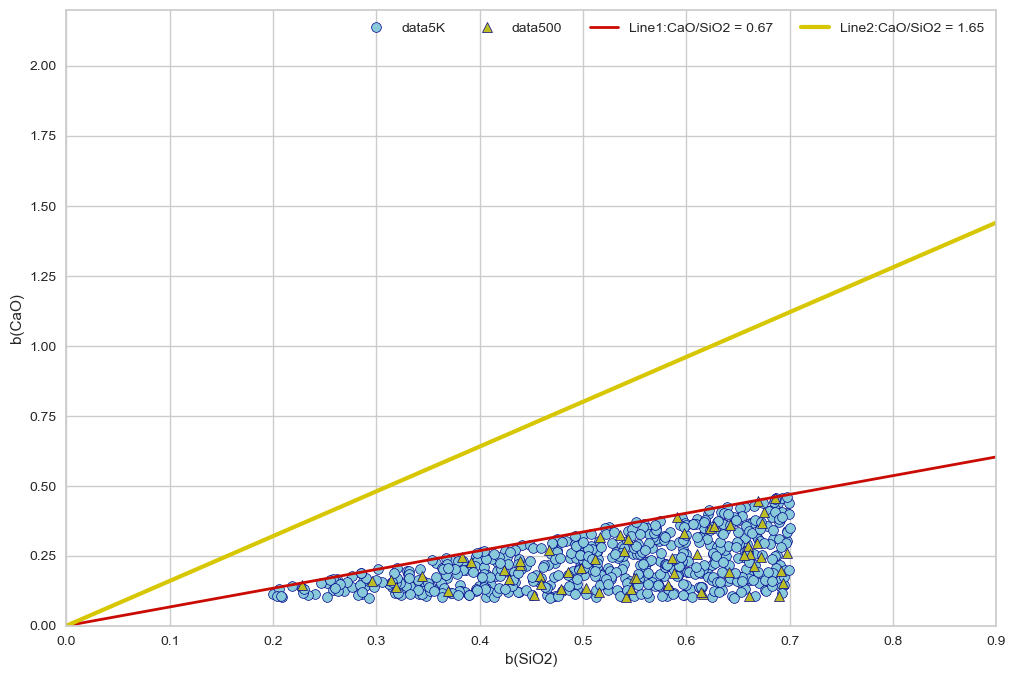

In [114]:
### Visualizing the three groups 
fig, ax =plt.subplots(figsize=(12,8))
df1 = data[data['pH']<=9.794]
df2 = data5k[data5k['pH']<=9.794]
           
x1= np.linspace(0.0,0.9,30);
y1 = 0+0.67*x1
x2= np.linspace(0.0,0.9,30);
y2 = 0+1.60*x2
ax.plot(df2['b(SiO2)'].values,df2['b(CaO)'].values,'bo',markerfacecolor = 'c',markeredgecolor ='darkblue',markeredgewidth=0.5,label='data5K')
ax.plot(df1['b(SiO2)'].values,df1['b(CaO)'].values,'b^',markerfacecolor = 'tab:olive',markeredgecolor ='darkblue',markeredgewidth=0.5,label='data500')
#ax.plot(group2['b(SiO2)'].values,group2['b(CaO)'].values,'bo',markerfacecolor = 'c',markeredgecolor ='b',markeredgewidth=0.5,label='group2')
#ax.plot(group3['b(SiO2)'].values,group3['b(CaO)'].values,'g^',markerfacecolor = 'm',markeredgecolor ='m',markeredgewidth=1,label='group3')
ax.plot(x1,y1,'r-',lw=2,label ='Line1:CaO/SiO2 = 0.67')
ax.plot(x2,y2,'y-',lw=3,label ='Line2:CaO/SiO2 = 1.65')
ax.legend (loc='best',ncol=5)           
ax.set_xlim(0,0.9)
ax.set_ylim(0,2.2)

ax.set_xlabel('b(SiO2)')
ax.set_ylabel('b(CaO)')


In [29]:
### Save the data to local drive
testDF = pd.DataFrame(test_XY,columns=data.columns)
group1DF_train = pd.DataFrame(group1_XY_train,columns=data.columns)
group2DF_train = pd.DataFrame(group2_XY_train,columns=data.columns)
group3DF_train = pd.DataFrame(group3_XY_train,columns=data.columns)


## exclude the ratio column
testDF.loc[:,testDF.columns!='ratio'].to_csv('dataset_test.csv',index=False)
group1DF_train.loc[:,group1DF_train.columns!='ratio'].to_csv('Group1_trainning_dataset.csv',index=False)
group2DF_train.loc[:,group2DF_train.columns!='ratio'].to_csv('Group2_trainning_dataset.csv',index=False)
group3DF_train.loc[:,group3DF_train.columns!='ratio'].to_csv('Group3_trainning_dataset.csv',index=False)




In [91]:
profile5k =  ProfileReport(data5k)
profile5k.to_file('datareport_5kdata.html')

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## The following Section is to trainning the models

the mian idea is to train models for each of the output variables <br>
    for each of the three groups. <br>
    <ul>
    <li> If the output variable is constant, no needs to train a model; <br> </li>
    <li> if the output varaible has linear rerlationship with any of the three input variables, b(CaO), b(SiO2), <br>
        or b(H2O), a linear model will be provided,<br></li>
    <li> otherwise, a ML model will be trained </li>
    </ul>
    